In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
file='/content/drive/My Drive/Assignments/cifar-10-batches-py/data_batch_4'
file1=unpickle(file)
print(file1)

{b'batch_label': b'training batch 4 of 5', b'labels': [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1, 4, 2, 3, 2, 1, 2, 8, 9, 5, 0, 7, 6, 7, 6, 8, 8, 7, 4, 9, 1, 2, 6, 5, 9, 4, 2, 5, 1, 0, 1, 1, 9, 0, 7, 5, 3, 9, 6, 3, 3, 3, 4, 1, 5, 9, 7, 7, 2, 9, 0, 2, 8, 5, 9, 6, 7, 8, 4, 0, 4, 9, 2, 7, 1, 0, 5, 1, 8, 1, 6, 5, 9, 7, 0, 4, 5, 2, 3, 5, 5, 6, 0, 2, 1, 1, 5, 8, 5, 2, 4, 2, 2, 5, 3, 0, 3, 0, 2, 9, 1, 1, 7, 3, 8, 5, 4, 5, 9, 6, 5, 6, 4, 4, 5, 5, 1, 1, 5, 6, 2, 5, 0, 8, 6, 2, 2, 6, 8, 8, 6, 7, 4, 0, 4, 1, 5, 4, 2, 0, 3, 0, 9, 5, 7, 8, 1, 1, 7, 8, 8, 3, 0, 0, 4, 7, 9, 6, 0, 9, 9, 9, 2, 1, 1, 7, 4, 3, 7, 5, 5, 7, 9, 3, 6, 9, 7, 5, 7, 1, 7, 0, 5, 6, 7, 3, 0, 4, 5, 1, 1, 8, 8, 6, 3, 2, 9, 7, 8, 1, 3, 9, 8, 6, 9, 2, 4, 4, 1, 4, 2, 4, 5, 2, 0, 1, 5, 1, 2, 1, 2, 0, 2, 4, 4, 1, 1, 2, 9, 5, 6, 4, 2, 8, 7, 2, 7, 4, 0, 2, 6, 5, 8, 8, 9, 7, 7, 3, 0, 4, 1, 3, 0, 0, 8, 7, 5, 9, 8, 7, 5, 0, 1, 4, 5, 6, 9, 2, 2, 3, 4, 5, 4, 6, 1, 8, 0, 7, 0, 7, 8, 4, 5, 6, 8, 0, 3, 4, 4, 5, 9, 5, 3, 2, 1, 1, 

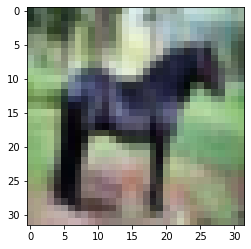

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## To extract rgb channels of an image 
def rgb_img_extract(label_no):
  I=np.array(file1[b'data'][label_no,:])
  red=np.reshape(np.array(I[0:1024]),(32,32))
  gr=np.reshape(np.array(I[1024:2048]),(32,32))
  bl=np.reshape(np.array(I[2048:3072]),(32,32))
  rgb=np.array([red,gr,bl])
  img1=np.dstack([red,gr,bl])
  return rgb,img1
rgb_img,img1=rgb_img_extract(4)
plt.imshow(img1)

In [ ]:
import numpy as np

###padding the image
def resize_img(img,M):
  s=img.shape
  row=s[0]+M-1
  col=s[1]+M-1
  a1=((M-1))
  a2=((M-1))
  N=np.zeros((row,col),int)
  for i in range(s[0]):
     for j in range(s[1]):
       N[i+np.int(a1),j+np.int(a2)]=img[i,j]
  return N

###convolution 
def convol(image,filter):
  M=len(filter)
  NJ=resize_img(image,M)
  s=NJ.shape
  convd_rest=np.zeros(image.shape,int)
  for i in range(0,s[0]-M+1):
    for j in range(0,s[1]-M+1):
      a=NJ[i:i+M,j:j+M]
      res=a*filter
      convd_rest[i,j]=np.sum(res) 
  return convd_rest

###ReLU Activation
def ReLU(x):
  X=np.maximum(x,0)
  return X

###(2x2)max pooling with stride 2
def maxpool(image):
  M=2
  s=image.shape
  x=np.int(s[0]/2)
  y=np.int(s[1]/2)
  maxpool_rest=np.zeros((x,y),int)
  for i in range(0,s[0]-M+1,2):
    for j in range(0,s[1]-M+1,2):
      a=image[i:i+M,j:j+M]
      maxpool_rest[np.int(i/2),np.int(j/2)]=np.amax(a)
  return maxpool_rest


##DoG filter for conv layer 1
def DoG_fil_1(sigma):
  DoG1=np.zeros((3,3,3),float)
  for i in range(-1,2):
    for j in range(-1,2):
      for k in range(-1,2):
        sig=sigma
        aa=2*sig
        con1=(np.sqrt(2*np.pi*(sig**2)))**3
        con2=(np.sqrt(2*np.pi*((aa*sig)**2)))**3
        DoG1[i+1,j+1,k+1]=((1/con1)*np.exp(-(((i)**2)+((j)**2)+((k)**2))/(2*(sig**2))))-((1/con2)*np.exp(-((i**2)+(j**2)+((k)**2))/(2*((aa*sig)**2))))
  return DoG1
  
##DoG filter for conv layer 2
def DoG_fil_2(sigma):
  DoG2=np.zeros((4,3,3),float)
  for k in range(4):
    for i in range(-1,2):
      for j in range(-1,2):
        sig=sigma
        aa=2*sig
        con1=((2*np.pi*(sig**2)))
        con2=((2*np.pi*((aa*sig)**2)))
        DoG2[k,i+1,j+1]=(1/con1)*np.exp(-(((i)**2)+((j)**2))/(2*(sig**2)))-((1/con2)*np.exp(-((i**2)+(j**2)+((k)**2))/(2*((aa*sig)**2))))
  return DoG2

conv layer1 output for Randaom filter (filter_name=1)


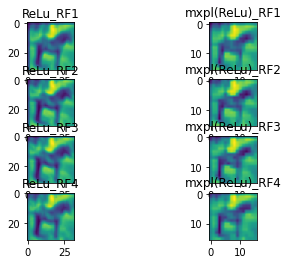

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
###conv layer 1
def conv_lay1(rgb1,filter_name):
  conv_l1_op=np.zeros((4,32,32))
  maxp_l1=np.zeros((4,16,16))
  if (filter_name==1):         ####RF(Random filter) filter
    for j in range(0,4):
      fil= np.random.randint(-5,10,size=(3,3,3))
      conv_ch=np.zeros((3,32,32))
      for i in range(0,3):
        filter=np.array(fil[i,:,:])
        image=np.array(rgb1[i,:,:])
        conv_ch[i,:,:]=convol(image,filter)
      conv_l1_op[j,:,:]=conv_ch[0,:,:]+conv_ch[1,:,:]+conv_ch[2,:,:]
      relu_op=ReLU(conv_l1_op[j,:,:])
      maxp_l1[j,:,:]=maxpool(relu_op)
      plt.subplot(4,2,2*j+1)        ###befor maxpooling with random filter(RF)
      plt.title('ReLu_RF'+str(j+1))
      plt.imshow(relu_op)
      plt.subplot(4,2,2*j+2)        ###after maxpooling with random filter(RF)
      plt.title('mxpl(ReLu)_RF'+str(j+1))
      plt.imshow((maxp_l1[j,:,:]))
  elif (filter_name==2):    ####DoG filter
    for j in range(0,4):
      sigma=j+1
      fil=DoG_fil_1(sigma)
      conv_ch=np.zeros((3,32,32))
      for i in range(0,3):
        filter=np.array(fil[i,:,:])
        image=np.array(rgb1[i,:,:])
        conv_ch[i,:,:]=convol(image,filter)
      conv_l1_op[j,:,:]=conv_ch[0,:,:]+conv_ch[1,:,:]+conv_ch[2,:,:]
      relu_op=ReLU(conv_l1_op[j,:,:])
      maxp_l1[j,:,:]=maxpool(relu_op)
      plt.subplot(4,2,2*j+1)           ###before maxpooling with DoG filter
      plt.title('ReLu_DoG'+str(j+1))
      plt.imshow(relu_op)
      plt.subplot(4,2,2*j+2)           ###after maxpooling with DoG filter
      plt.title('mxpl(ReLu)_DoG'+str(j+1))
      plt.imshow((maxp_l1[j,:,:]))
  return maxp_l1

###conv layer1 output for Randaom filter (filter_name=1)
print('conv layer1 output for Randaom filter (filter_name=1)')
conv_L2_ip1=conv_lay1(rgb_img,1)


conv layer1 output for Dog filter (filter_name=2)


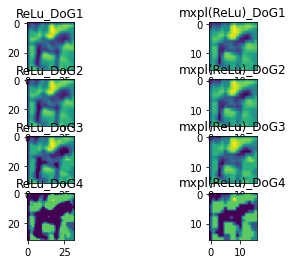

In [ ]:
###conv layer1 output for Dog filter (filter_name=2)
print('conv layer1 output for Dog filter (filter_name=2)')
conv_L2_ip2=conv_lay1(rgb_img,2)

conv layer2 output for Random filter (Random_name=1)


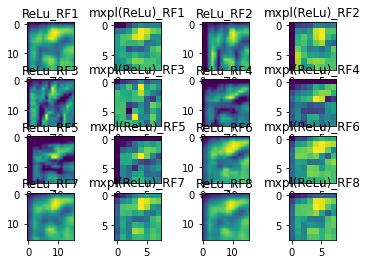

In [ ]:
###conv layer 2
import numpy as np

def conv_lay2(conv_L2_ip1,conv_L2_ip2,filter_name):
  conv_l2_op=np.zeros((8,16,16))
  maxp_l2_op=np.zeros((8,8,8))
  if (filter_name==1):
      for j in range(0,8):
        fil1= np.random.randint(-5,10,size=(4,3,3))
        conv_ch=np.zeros((4,16,16))
        for i in range(0,4):
            filter=np.array(fil1[i,:,:])
            image=np.array(conv_L2_ip1[i,:,:])
            conv_ch[i,:,:]=convol(image,filter)
        conv_l2_op[j,:,:]=conv_ch[0,:,:]+conv_ch[1,:,:]+conv_ch[2,:,:]
        relu_op=ReLU(conv_l2_op[j,:,:])
        maxp_l2_op[j,:,:]=maxpool(relu_op)
        plt.subplot(4,4,2*j+1)
        plt.title('ReLu_RF'+str(j+1))
        plt.imshow(relu_op)
        plt.subplot(4,4,2*j+2)
        plt.title('mxpl(ReLu)_RF'+str(j+1))
        plt.imshow((maxp_l2_op[j,:,:]))
     ###############DoG###########
  elif(filter_name==2):
    for j in range(0,8):
      sigma=0.1*j+1        
      fil2=DoG_fil_2(sigma)
      conv_ch2=np.zeros((4,16,16))
      for i in range(0,4):
        filter2=np.array(fil2[i,:,:])
        image2=np.array(conv_L2_ip2[i,:,:])
        conv_ch2[i,:,:]=convol(image2,filter2)
      conv_l2_op[j,:,:]=conv_ch2[0,:,:]+conv_ch2[1,:,:]+conv_ch2[2,:,:]
      relu_op2=ReLU(conv_l2_op[j,:,:])
      maxp_l2_op[j,:,:]=maxpool(relu_op2)
      #plt.figure()
      plt.subplot(4,4,2*j+1)
      plt.title('ReLu_DoG'+str(j))
      plt.imshow(relu_op2)
      plt.subplot(4,4,2*j+2)
      plt.title('mxpl(ReLu)_DoG'+str(j))
      plt.imshow((maxp_l2_op[j,:,:]))
      
  return maxp_l2_op
###conv layer2 output for Random filter (filter_name=1)
print('conv layer2 output for Random filter (filter_name=1)')
con_l2_op1=conv_lay2(conv_L2_ip1,conv_L2_ip2,1)


conv layer2 output for Dog filter (filter_name=2)


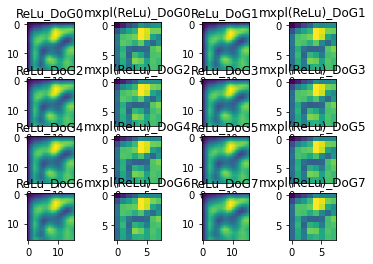

In [ ]:
###conv layer2 output for Dog filter (filter_name=2)
print('conv layer2 output for Dog filter (filter_name=2)')
con_l2_op2=conv_lay2(conv_L2_ip1,conv_L2_ip2,2)

In [ ]:
##MLP in forward mode
def MLP(con_l2_mp_op):
  out=con_l2_mp_op.flatten()
  mlp_ip=np.reshape(out,(1,512))
  alpha=np.random.randint(-10,10,size=(512,512))
  z=ReLU(np.matmul(alpha,mlp_ip.T))
  #print(z.shape)
  beta=np.random.randint(-10,10,size=(512,10))
  y=ReLU(np.matmul(beta.T,z))
  return y
mlp_ot2=MLP(con_l2_op2)

(512, 1)


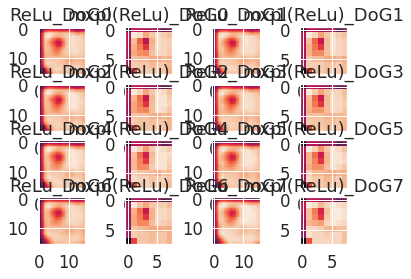

In [ ]:
###overall CNN
def CNN(inp_image):
  conv_Lay2_ip1=0 ##here for tsne plotting only DoG outputs are being considered
  conv_Lay2_ip2=conv_lay1(inp_image,2)
  con_lay2_op2=conv_lay2(conv_Lay2_ip1,conv_Lay2_ip2,2)
  out=con_lay2_op2.flatten()
  out_y=np.reshape(out,(1,512))
  return out_y

###extracting 5 images from each class(10)
img_lab=np.zeros((10,5))
for j in range(10):
  index=[i for i in range(len(file1[b'labels'])) if file1[b'labels'][i]==j]
  img_lab[j,:]=index[0:5]
label_no=img_lab.reshape(50,1)    ##labels for all 50 images with 5 images in each class
flat_out=np.zeros((50,512),float) ##flattened output for all 50 images
for i in range(50):
  inp_img,pic=rgb_img_extract(np.int(label_no[i,0]))
  flat_out[i,:]=CNN(inp_img)
##create corresponding labels for the flattened output obtained in flat_out
count=0
corresp_labels=np.zeros((50),int)
for i in range(10):
    for j in range(5):
         corresp_labels[count]=i
         count=count+1
###ignore the output below which is generated for some arbitrary last image in class 10

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


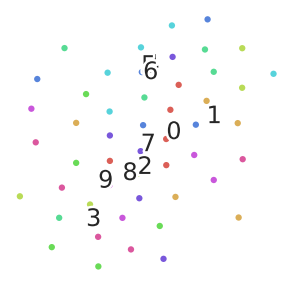

In [ ]:
####code used from internet to do t-SNE plotting for 50 images with 5 images for each class

def tnse_plot(x_subset,y_subset):
  import time
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib.patheffects as PathEffects
  %matplotlib inline

  import seaborn as sns
  sns.set_style('darkgrid')
  sns.set_palette('muted')
  sns.set_context("notebook", font_scale=1.5,
                  rc={"lines.linewidth": 2.5})
  RS = 123

  # Utility function to visualize the outputs of PCA and t-SNE

  def fashion_scatter(x, colors):
      # choose a color palette with seaborn.
      num_classes = len(np.unique(colors))
      palette = np.array(sns.color_palette("hls", num_classes))

      # create a scatter plot.
      f = plt.figure(figsize=(5, 5))
      ax = plt.subplot(aspect='equal')
      sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
      plt.xlim(-25, 25)
      plt.ylim(-25, 25)
      ax.axis('off')
      ax.axis('tight')

      # add the labels for each digit corresponding to the label
      txts = []

      for i in range(num_classes):

          # Position of each label at median of data points.

          xtext, ytext = np.median(x[colors == i, :], axis=0)
          txt = ax.text(xtext, ytext, str(i), fontsize=24)
          txt.set_path_effects([
              PathEffects.Stroke(linewidth=5, foreground="w"),
              PathEffects.Normal()])
          txts.append(txt)

      return f, ax, sc, txts
      
  from sklearn.manifold import TSNE
  import time
  time_start = time.time()

  fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

  time_start = time.time()

  from sklearn.decomposition import PCA

  time_start = time.time()

  pca = PCA(n_components=4)
  pca_result = pca.fit_transform(x_subset)

  pca_50 = PCA(n_components=50)
  pca_result_50 = pca_50.fit_transform(x_subset)

  import time
  time_start = time.time()
  fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)
  fashion_scatter(fashion_pca_tsne, y_subset)

###t-SNE plot for the bandpass(DoG) filter choice of kernels for 50 images (5 images per class x 10 classes)
tsne=tnse_plot(flat_out,corresp_labels)
